In [16]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
posenet_path = 'E:\\projects\\pg-toons\\posenet-python'

In [18]:
def extract_features(image):
    orb = cv2.ORB_create()
    kp = orb.detect(image)
    kp, des = orb.compute(image, kp)
    return kp, des

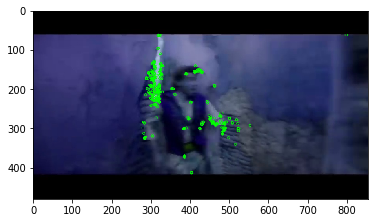

(<matplotlib.image.AxesImage at 0x203c538ee48>, None)

In [19]:
image = cv2.imread(os.path.join(posenet_path, '..\\', 'frame1.jpg'))
kp, des = extract_features(image)
image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(image), plt.show()

In [24]:
def extract_features_dataset(images):
    kp_list = []
    des_list = []
    
    for image in images:
        kp, des = extract_features(image)
        kp_list.append(kp)
        des_list.append(des)
    
    return kp_list, des_list

In [49]:
def match_features(des1, des2):
    bf = cv2.BFMatcher()
    match = bf.knnMatch(des1, des2, k=2) # get two closest key points to each key point
    
    return match

In [38]:
def filter_matches_distance(match, dist_thresh):
    filtered_match = []
    
    for m, n in match:
        if m.distance < dist_thresh * n.distance:
            filtered_match.append(m)
    
    return filtered_match

In [45]:
def visualize_matches(img1, kp1, img2, kp2, match):
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, match, None)
    plt.figure(figsize=(16, 6), dpi=100)
    plt.imshow(img_matches)

In [42]:
images = [cv2.imread(os.path.join(posenet_path, '..\\', 'frame1.jpg')), cv2.imread(os.path.join(posenet_path, '..\\', 'frame2.jpg'))]
kp_list, des_list = extract_features_dataset(images)
match = match_features(des_list[0], des_list[1])
filtered_match = filter_matches_distance(match, 0.6)

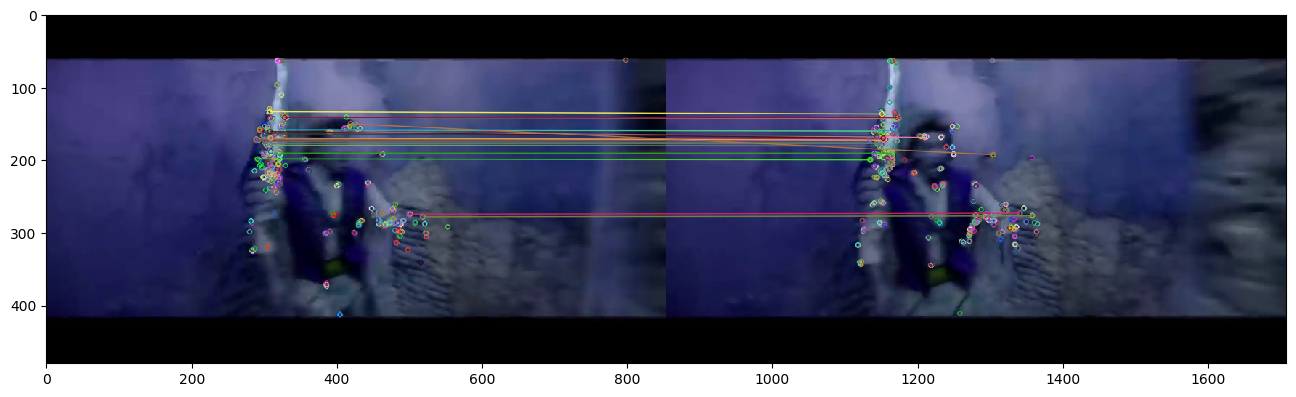

In [43]:
image_matches = cv2.drawMatches(images[0], kp_list[0], images[1], kp_list[1], filtered_match, None)
plt.figure(figsize=(16, 6), dpi=100)
plt.imshow(image_matches)

In [47]:
def match_features_dataset(des_list):
    matches = []
    dist_thresh = 0.6
    for i in range(len(des_list) - 1):
        des1 = des_list[i]
        des2 = des_list[i + 1]
        match = match_features(des1, des2)
        filtered_match = filter_matches_distance(match, dist_thresh)
        matches.append(filtered_match)
    return matches

In [50]:
all_matches = match_features_dataset(des_list)

In [51]:
all_matches

[[<DMatch 00000203C587B0F0>,
  <DMatch 00000203C587B6B0>,
  <DMatch 00000203C587B6F0>,
  <DMatch 00000203C587B870>,
  <DMatch 00000203C58847F0>,
  <DMatch 00000203C5884B30>,
  <DMatch 00000203C5884C70>,
  <DMatch 00000203C5884DF0>,
  <DMatch 00000203C5884E70>,
  <DMatch 00000203C58866B0>,
  <DMatch 00000203C5886730>,
  <DMatch 00000203C5888330>,
  <DMatch 00000203C5888F70>,
  <DMatch 00000203C588A1F0>,
  <DMatch 00000203C588A3F0>,
  <DMatch 00000203C588A8F0>,
  <DMatch 00000203C588C070>,
  <DMatch 00000203C588C290>,
  <DMatch 00000203C588D450>,
  <DMatch 00000203C588D8D0>,
  <DMatch 00000203C588DF50>,
  <DMatch 00000203C588E150>]]